In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Password_strength_Classifier_data.csv',warn_bad_lines=False,error_bad_lines=False)

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

In [6]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


<AxesSubplot:xlabel='strength', ylabel='count'>

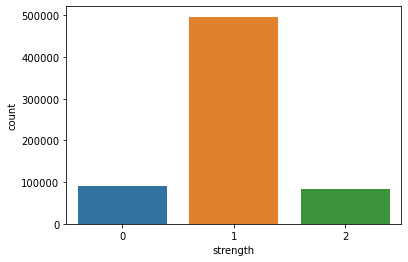

In [9]:
sns.countplot(df['strength'])

# Random Shuffling 

In [10]:
password_tuple = df[['password','strength']].values
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
import random
random.shuffle(password_tuple)

In [12]:
X = [data[0] for data in password_tuple]

In [13]:
y = [data[1] for data in password_tuple]

In [14]:
X

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'kzde5577',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'kino3434',
 'megzy123',
 'lamborghin1',
 'asv5o9yu',
 'u6c8vhow',
 'kino3434',
 '612035180tok',
 '612035180tok',
 'WUt9IZzE0OQ7PkNE',
 'asv5o9yu',
 'megzy123',
 '6975038lp',
 '6975038lp',
 'kzde5577',
 'megzy123',
 'WUt9IZzE0OQ7PkNE',
 'asv5o9yu',
 'faranumar91',
 'visi7k1yr',
 'kzde5577',
 'intel1',
 'WUt9IZzE0OQ7PkNE',
 'kzde5577',
 '0169395484a',
 'visi7k1yr',
 'kino3434',
 'g067057895',
 'g067057895',
 'universe2908',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'exitos2009',
 'memjan123',
 'fk9qi21m',
 'megzy123',
 'memjan123',
 'jerusalem393',
 'fahad123',
 '52558000aaa',
 'lamborghin1',
 'idofo673',
 'lamborghin1',
 'kzde5577',
 'WUt9IZzE0OQ7PkNE',
 'jytifok873',
 'megzy123',
 'asgaliu11',
 'yitbos77',
 'fahad123',
 'cigicigi123',
 'cigicigi123',
 'megzy123',
 'intel1',
 'pHyqueDIyNQ8vmhb',
 'u6c8vhow',
 'alimagik1',
 'megzy123',
 'u6c8vhow',
 'faranumar91',
 'snolyuj04',
 'bgrvl80',
 'cz

# Vectorizing the passwords

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
def word_divide_char(word):
    array = []
    for i in word:
        array.append(i)
    return array

In [17]:
tfidf = TfidfVectorizer(tokenizer = word_divide_char)

In [18]:
vector_X = tfidf.fit_transform(X)

In [19]:
vector_X.shape

(669639, 127)

In [20]:
tfidf.get_feature_names()

['\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'è',
 'é',
 'ê',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '‚',
 '‹',
 '›']

# Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(vector_X,y)

In [23]:
X_train

<502229x127 sparse matrix of type '<class 'numpy.float64'>'
	with 4232333 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Logreg = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')

In [26]:
Logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [27]:
y_pred = Logreg.predict(X_test)

In [28]:
Logreg.score(X_train,y_train)

0.8204464497271166

In [29]:
Logreg.score(X_test,y_test)

0.8190789080700077

In [30]:
dt = np.array(['*H4rVgk$'])

In [31]:
dtm = tfidf.transform(dt)

In [32]:
Logreg.predict(dtm)

array([2])

In [33]:
dt = np.array([''])

In [34]:
dtm = tfidf.transform(dt)

In [35]:
Logreg.predict(dtm)

array([1])

# XgBoostClassifier

In [35]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [36]:
model.fit(X_train,y_train)

[11:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
predictions = model.predict(X_test)

In [38]:
model.score(X_train,y_train)

0.9909642812342577

In [39]:
model.score(X_test,y_test)

0.9862732214324115

In [40]:
dt = np.array(['7%$r&P9*p9'])

dtm = tfidf.transform(dt)

Logreg.predict(dtm)

array([2])

In [37]:


dt = np.array(['*H4rVgk$'])

dtm = tfidf.transform(dt)

Logreg.predict(dtm)

array([2])